In [44]:
import sys
print(sys.executable)

C:\Users\m216126\Anaconda3\python.exe


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import json
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\m216126\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
tweet_dataset = pd.read_csv('resultsElection2020-9-12.csv')

In [22]:
tweet_dataset.shape

(5437, 5)

In [23]:
tweet_dataset.head()

,2020-09-12 06:00:01,1304661019499741186,"b""RT @MaggieJordanACN: 'This is over the top': Lindsey Graham and Mick Mulvaney begged Trump not to kill Iran's top general, but 4 days later\xe2\x80\xa6""","User(_api=<tweepy.api.API object at 0x10b53cb10>, _json={'id': 2305879171, 'id_str': '2305879171', 'name': 'Jim', 'screen_name': 'satirist_indian', 'location': 'United States', 'description': 'Satirist by choice, Indian by birth, American by heart, Satire is the last beacon of Free Speech. RTs not Endorsements.', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 2159, 'friends_count': 3835, 'listed_count': 229, 'created_at': 'Thu Jan 23 03:26:28 +0000 2014', 'favourites_count': 879720, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 559826, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': 'C0DEED', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/477350611772383232/sh8VXKY0_normal.jpeg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/477350611772383232/sh8VXKY0_normal.jpeg', 'profile_link_color': '2700B3', 'profile_sidebar_border_color': 'C0DEED', 'profile_sidebar_fill_color': 'DDEEF6', 'profile_text_color': '333333', 'profile_use_background_image': True, 'has_extended_profile': False, 'default_profile': False, 'default_profile_image': False, 'following': False, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}, id=2305879171, id_str='2305879171', name='Jim', screen_name='satirist_indian', location='United States', description='Satirist by choice, Indian by birth, American by heart, Satire is the last beacon of Free Speech. RTs not Endorsements.', url=None, entities={'description': {'urls': []}}, protected=False, followers_count=2159, friends_count=3835, listed_count=229, created_at=datetime.datetime(2014, 1, 23, 3, 26, 28), favourites_count=879720, utc_offset=None, time_zone=None, geo_enabled=False, verified=False, statuses_count=559826, lang=None, contributors_enabled=False, is_translator=False, is_translation_enabled=False, profile_background_color='C0DEED', profile_background_image_url='http://abs.twimg.com/images/themes/theme1/bg.png', profile_background_image_url_https='https://abs.twimg.com/images/themes/theme1/bg.png', profile_background_tile=False, profile_image_url='http://pbs.twimg.com/profile_images/477350611772383232/sh8VXKY0_normal.jpeg', profile_image_url_https='https://pbs.twimg.com/profile_images/477350611772383232/sh8VXKY0_normal.jpeg', profile_link_color='2700B3', profile_sidebar_border_color='C0DEED', profile_sidebar_fill_color='DDEEF6', profile_text_color='333333', profile_use_background_image=True, has_extended_profile=False, default_profile=False, default_profile_image=False, following=False, follow_request_sent=False, notifications=False, translator_type='none')","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'MaggieJordanACN', 'name': 'Maggie Jordan', 'id': 617854798, 'id_str': '617854798', 'indices': [3, 19]}], 'urls': []}"
0,2020-09-12 06:00:01,1304661019151798277,"b'Watch: Donald Trump hails Israel, Bahrain no...",User(_api=<tweepy.api.API object at 0x10b53cb1...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
1,2020-09-12 06:00:01,1304661019092951040,b'RT @MeidasTouch: There is a good chance twit...,User(_api=<tweepy.api.API object at 0x10b53cb1...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
2,2020-09-12 06:00:01,1304661018984042498,b'@TulsiGabbard Tulsi absolutely demolished Ka...,User(_api=<tweepy.api.API object at 0x10b53cb1...,"{'hashtags': [], 'symbols': [], 'user_mentions..."
3,2020-09-12 06:00:00,1304661018648416257,b'Logicamebt

In [27]:
tweet_dataset.columns = ['Date','id','tweet','tweet_info','metadata']

In [28]:
tweet_dataset['tweet'].head(10)

0    b'Watch: Donald Trump hails Israel, Bahrain no...
1    b'RT @MeidasTouch: There is a good chance twit...
2    b'@TulsiGabbard Tulsi absolutely demolished Ka...
3    b'Logicamebte por el tio adolf trump esta bien...
4    b'Though he is the sitting president, it\xe2\x...
5    b'#ElSolDeC\xc3\xb3rdoba \xf0\x9f\x95\xaf| Tru...
6    b'@MrsMalindo @LtJFK @lindyli @MeidasTouch Abs...
7    b'Trump: Bahrain to Recognize Israel https://t...
8    b'RT @Swamy39: President Trump is a brilliant ...
9    b'Trump Fans Give CNN\xe2\x80\x99s Jim Acosta ...
Name: tweet, dtype: object

In [116]:
#Cleaning Tweets

corpus = []
for i in range(0, int(tweet_dataset.shape[0])):
    tweet = re.sub('[^a-zA-Z0-9]', ' ', tweet_dataset['tweet'][i])
    tweet = tweet.lower()
#     tweet = re.sub('rt', '', tweet)
    tweet = re.sub("b'", '', tweet)
    tweet = re.sub('https', '', tweet)
    tweet = re.sub(r'[^\x00-\x7f]','', tweet)
    tweet = tweet.split()
#     ps = PorterStemmer()
#     tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    for j in range(len(tweet)):
        if len(tweet[j]) <= 3:
            tweet[j] = ''
        elif (len(tweet[j]) == 4) and (tweet[j][0]=='x'):
            tweet[j] = ''
    tweet = ' '.join(tweet)
    corpus.append(tweet)

In [117]:
print(corpus[60])

  scottpresler   creep  called  parent    phone   leave  voicemail calling     x9cfaggot     nyou  call  names      


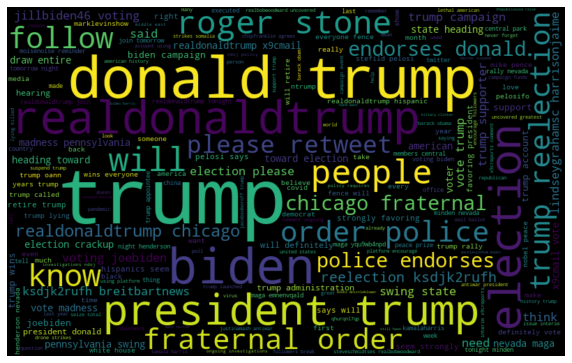

In [119]:
#Visualization

#Word Cloud
all_words = ' '.join([text for text in corpus])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()